## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### H(x) = aX + b 에서처럼, F = C*1.8 +32 
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
Chain Rule 증명 ----> 구글 검색 하면 여기에 사용되는 증명 공식들,,미분, 편미분..공식들이 나온다.참조바람

### Configuration (or prerequisite)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

#### 선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

##### 섭씨는 오늘의 Feature가 된다
##### 화씨는 오늘의 label이 된다

In [21]:
C = np.random.randint(0,101,100)
F = C*1.8+32
print('{}\n\n{}'.format(C,F))

[100  89  44  21  43   9  29  11  19  97  24  71  29  60  91  81  65  73
  97  28  89  91   4  91  50  81  10  12  24  85  84  31  51  91  38  45
  79  54 100  39  72  70   3  89  89  17  78  60  24   6  11  70  15  87
  54  94  96  75  73   9  17  67  25  76  86  31  41  98  34  29  23  53
  92  36  62  71  78  71  46  60  19  17  69  27  84  74  40  95  64  70
  21  50  46   1  41  92  38  58  51  87]

[212.  192.2 111.2  69.8 109.4  48.2  84.2  51.8  66.2 206.6  75.2 159.8
  84.2 140.  195.8 177.8 149.  163.4 206.6  82.4 192.2 195.8  39.2 195.8
 122.  177.8  50.   53.6  75.2 185.  183.2  87.8 123.8 195.8 100.4 113.
 174.2 129.2 212.  102.2 161.6 158.   37.4 192.2 192.2  62.6 172.4 140.
  75.2  42.8  51.8 158.   59.  188.6 129.2 201.2 204.8 167.  163.4  48.2
  62.6 152.6  77.  168.8 186.8  87.8 105.8 208.4  93.2  84.2  73.4 127.4
 197.6  96.8 143.6 159.8 172.4 159.8 114.8 140.   66.2  62.6 156.2  80.6
 183.2 165.2 104.  203.  147.2 158.   69.8 122.  114.8  33.8 105.8 197.6
 100.4 136

In [17]:
# 데이터 확인
print('C : ',C.shape,' // F : ', F.shape)

C :  (100,)  // F :  (100,)


### visualization

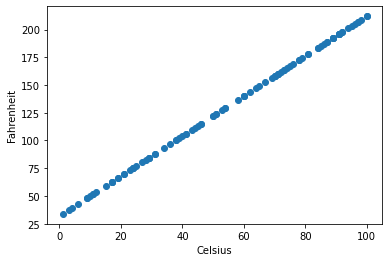

In [22]:
plt.scatter(C,F)
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### 우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성. 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.

### Bias (편향 찾기) -- Weight는 1.8

#### Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.

In [96]:
X,y=C,F


In [97]:
# 랜덤값 지정할 때는 정규분포에서 가져오는 게 좋다
w = 1.8
b=np.random.uniform(low=-1.0, high=1.0)
w,b

(1.8, 0.5782138042689469)

In [98]:
y_predict = w*X+b
y_predict[:10]

array([180.5782138, 160.7782138,  79.7782138,  38.3782138,  77.9782138,
        16.7782138,  52.7782138,  20.3782138,  34.7782138, 175.1782138])

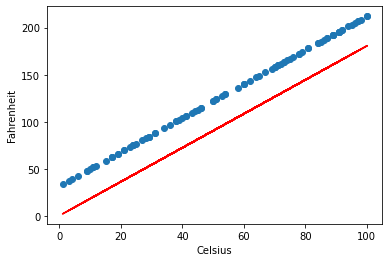

In [99]:
# 오차는 전적으로 Bias 탓
plt.scatter(X,y)
plt.plot(X,y_predict,c='r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [100]:
b=b-(y_predict-y).mean()
b
y_predict = w*X+b
y_predict[:10]

array([212. , 192.2, 111.2,  69.8, 109.4,  48.2,  84.2,  51.8,  66.2,
       206.6])

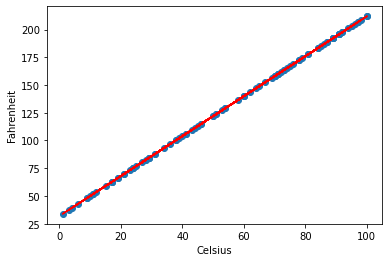

In [101]:
# 오차만큼 빼주기
plt.scatter(X,y)
plt.plot(X,y_predict,c='r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

### 정규분포에 해당하는 Weight과 Bias 값을 랜덤하게 초기화
    실제값과 예측한 결과값 사이에 오차 발생
    오차를 줄이는 방법 == Loss Function이 0에 가까워지도록 학습 진행

In [ ]:
'''
초기값을 너무 랜덤하게 가져오면 학습이 힘들 수 있다
-->
현실 데이터들은 대게 정규분포형태를 취한다
그래서 정규분포에서 가져온다
random.uniform활용
'''

In [102]:
w = np.random.uniform(low=-1.0,high=1.0)
b = np.random.uniform(low=-1.0,high=1.0)
w,b

(0.686547393186828, 0.5709403069947783)

In [103]:
y_predict = w*X + b
y_predict[:10]

array([69.22567963, 61.6736583 , 30.77902561, 14.98843556, 30.09247821,
        6.74986685, 20.48081471,  8.12296163, 13.61534078, 67.16603745])

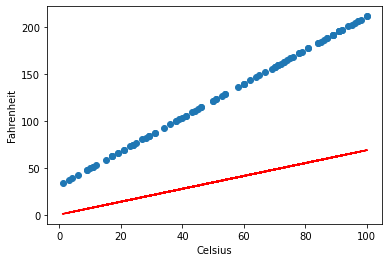

In [104]:
plt.scatter(X,y)
plt.plot(X,y_predict,c='r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [ ]:
'''
현재 오차가 심하다 == Loss가 크다
W, b를 보정해야 한다
Loss 0이 될 때까지 반복한다 (Back-Propagetion, Optimization)

0근처 오면 살금살금 가도록 조정하자
물론 미분값을 넣어주면 살금살금하지만
Learning_Rate을 잘 지정해주자

Loss =0 일 때 (w,b)을 출력하자

epoch : 최대 반복 수
'''

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
#### 이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [129]:
# 1. 최대 학습회수 설정
num_epoch = 100000
# 2. 학습속도... 작을수록 더욱 w, b 값이 미세하게 조정된다... 공식 상기하기... 학습시간이 오래 걸린다... 더 최적의 값을 찾는다
learning_rate = 0.0005 

w=np.random.uniform(low=-1.0,high=1.0)
b=np.random.uniform(low=-1.0,high=1.0)

for epoch in range(num_epoch):
    y_predict = w * X + b
    
    # 오차평균, Loss 구하기
    error = np.abs(y_predict-y).mean()
    
    if(error < 0.01) : 
        break
        
    # w, b를 보정 : 편미분, back propagtion
    w -= learning_rate*((y_predict-y)*X).mean()
    b -= learning_rate*(y_predict-y).mean()
    
    # 학습에 따른 Loss 변화량
    # 1만회마다 epoch, w ,b, error 찍어보기
    if epoch%10000==0:
        print('반복수 : {:5}, w : {:.4f}, b : {:.4f}, error : {:.1f}' . format(epoch,w,b,error))
print('----'*30)
print('최종')
print('반복수 : {:5}, w : {:.4f}, b : {:.4f}, error : {:.3f}' . format(epoch,w,b,error))

반복수 :     0, w : 3.6218, b : 0.5140, error : 88.7
반복수 : 10000, w : 1.9475, b : 21.6415, error : 4.0
반복수 : 20000, w : 1.8485, b : 28.5943, error : 1.3
반복수 : 30000, w : 1.8159, b : 30.8803, error : 0.4
반복수 : 40000, w : 1.8052, b : 31.6319, error : 0.1
반복수 : 50000, w : 1.8017, b : 31.8790, error : 0.0
반복수 : 60000, w : 1.8006, b : 31.9602, error : 0.0
------------------------------------------------------------------------------------------------------------------------
최종
반복수 : 63882, w : 1.8004, b : 31.9742, error : 0.010


### Predict

In [130]:
y_predict = w*X+b
y_predict[:10]

array([212.010946  , 192.20689913, 111.19034376,  69.78188213,
       109.38997587,  48.17746737,  84.18482531,  51.77820316,
        66.18114634, 206.60984231])

## Visualization

In [131]:
# DataFrame으로 시각화
result = pd.DataFrame({'C':C,'F':F,'F(predict)':y_predict})
result.head(10)

,C,F,F(predict)
0,100,212.0,212.010946
1,89,192.2,192.206899
2,44,111.2,111.190344
3,21,69.8,69.781882
4,43,109.4,109.389976
5,9,48.2,48.177467
6,29,84.2,84.184825
7,11,51.8,51.778203
8,19,66.2,66.181146
9,97,206.6,206.609842


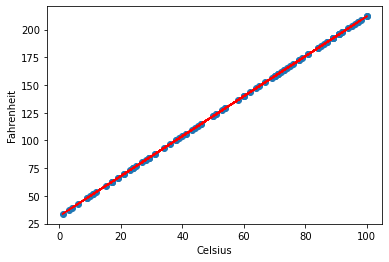

In [132]:
# matplot으로 시각화
plt.scatter(C,F)
plt.plot(C,y_predict,c='r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

#### 선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.